<a href="https://colab.research.google.com/github/faranak5171/Deep-Learning/blob/master/fashion_mnist_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torchvision import datasets, transforms
from torch import nn, optim
import torch.nn.functional as F

import matplotlib.pyplot as plt

In [2]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,),(0.5,))])

trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)


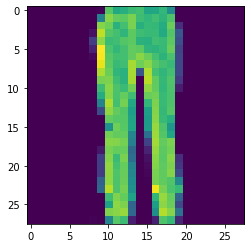

In [3]:
images, labels = next(iter(trainloader))
plt.imshow(images[8].squeeze().numpy())

In [4]:
class Classifier(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(784,256)
    self.fc2 = nn.Linear(256,128)
    self.fc3 = nn.Linear(128,64)
    self.fc4 = nn.Linear(64,10)

  def forward(self, x):
    x = x.view(x.shape[0],-1)
    x = F.ReLU(self.fc1(x))
    x = F.ReLU(self.fc2(x))
    x = F.ReLU(self.fc3(x))
    x = F.Log_softmax(self.f4(x), dim=1)
    return x

In [5]:
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.005)

In [ ]:
epochs = 5
train_losses, test_losses = [] , []
for epoch in range(epochs):
    running_loss = 0
    for images,labels in trainloader:

        optimizer.zero_grad()
        
        log_ps = model.forward(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    else:
        test_loss = 0
        accuracy = 0

        with torch.no_grad():
          for images, labels in testloader():
            
        print(f"training loss: {running_loss / len(trainloader)}")

Text(0.5, 1.0, 'T-shirt/top')

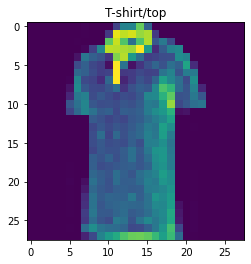

In [28]:
# Test network!
dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
img = img.resize_(1, 784)

# TODO: Calculate the class probabilities (softmax) for img
ps = F.softmax(model.forward(img), dim=1)
cat_index = torch.argmax(ps)
categoris = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker"]
plt.imshow(images[0].squeeze().numpy())
plt.title(categoris[cat_index])